# **<개요>**
Decision tree, Random forest, K-nearest neighbors, Gaussian naive Bayes, Adaboost, Gradient boost, XGBoost, Support vector machine 모델을 비교하는 코드입니다. **1. 2.**를 먼저 실행하고 원하는 모델을 실행시키면 됩니다. 각 모델 안에는 모델 설계와 학습, 테스트 과정이 함께 들어가 있습니다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

# **1. Data loading, analysis, visualization**

In [ ]:
df = pd.read_csv('/content/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
df.head(10).style.background_gradient(cmap="RdYlBu")

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.500000,43.000000,2.400000,64.000000,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,2.000000
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.000000,0.000000,17.000000,2.100000,0.000000,10.400000,130.000000,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,1.000000
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.100000,0.000000,13.400000,130.000000,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,1.000000
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.400000,0.000000,23.000000,117.000000,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,1.000000
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.000000,0.000000,16.000000,2.400000,0.000000,19.900000,117.000000,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,1.000000
5,134.000000,0.001000,0.000000,0.010000,0.009000,0.000000,0.002000,26.000000,5.900000,0.000000,0.000000,150.000000,50.000000,200.000000,5.000000,3.000000,76.000000,107.000000,107.000000,170.000000,0.000000,3.000000
6,134.000000,0.001000,0.000000,0.013000,0.008000,0.000000,0.003000,29.000000,6.300000,0.000000,0.000000,150.000000,50.000000,200.000000,6.000000,3.000000,71.000000,107.000000,106.000000,215.000000,0.000000,3.000000
7,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.000000,0.500000,6.000000,15.600000,68.000000,62.000000,130.000000,0.000000,0.000000,122.000000,122.000000,123.000000,3.000000,1.000000,3.000000
8,122.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,84.000000,0.500000,5.000000,13.600000,68.000000,62.000000,130.000000,0.000000,0.000000,122.000000,122.000000,123.000000,3.000000,1.000000,3.000000
9,122.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,86.000000,0.300000,6.000000,10.600000,68.000000,62.000000,130.000000,1.000000,0.000000,122.000000,122.000000,123.000000,1.000000,1.000000,3.000000


In [ ]:
#sns.pairplot(df) #시간 오래 걸려서 주석처리 했어요(데이터 확인용이라 굳이 필요한가 싶기도..)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
df.skew()

baseline value                                             0.020312
accelerations                                              1.204392
fetal_movement                                             7.811477
uterine_contractions                                       0.159315
light_decelerations                                        1.718437
severe_decelerations                                      17.353457
prolongued_decelerations                                   4.323965
abnormal_short_term_variability                           -0.011829
mean_value_of_short_term_variability                       1.657339
percentage_of_time_with_abnormal_long_term_variability     2.195075
mean_value_of_long_term_variability                        1.331998
histogram_width                                            0.314235
histogram_min                                              0.115784
histogram_max                                              0.577862
histogram_number_of_peaks                       

Let's check if there is any duplicates in the dataset.

In [ ]:
df[df.duplicated()]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [ ]:
df_dup = df.drop_duplicates(subset = None , keep = 'first', inplace = False)
df_dup.shape

(2113, 22)

In [ ]:
Target = df["fetal_health"]

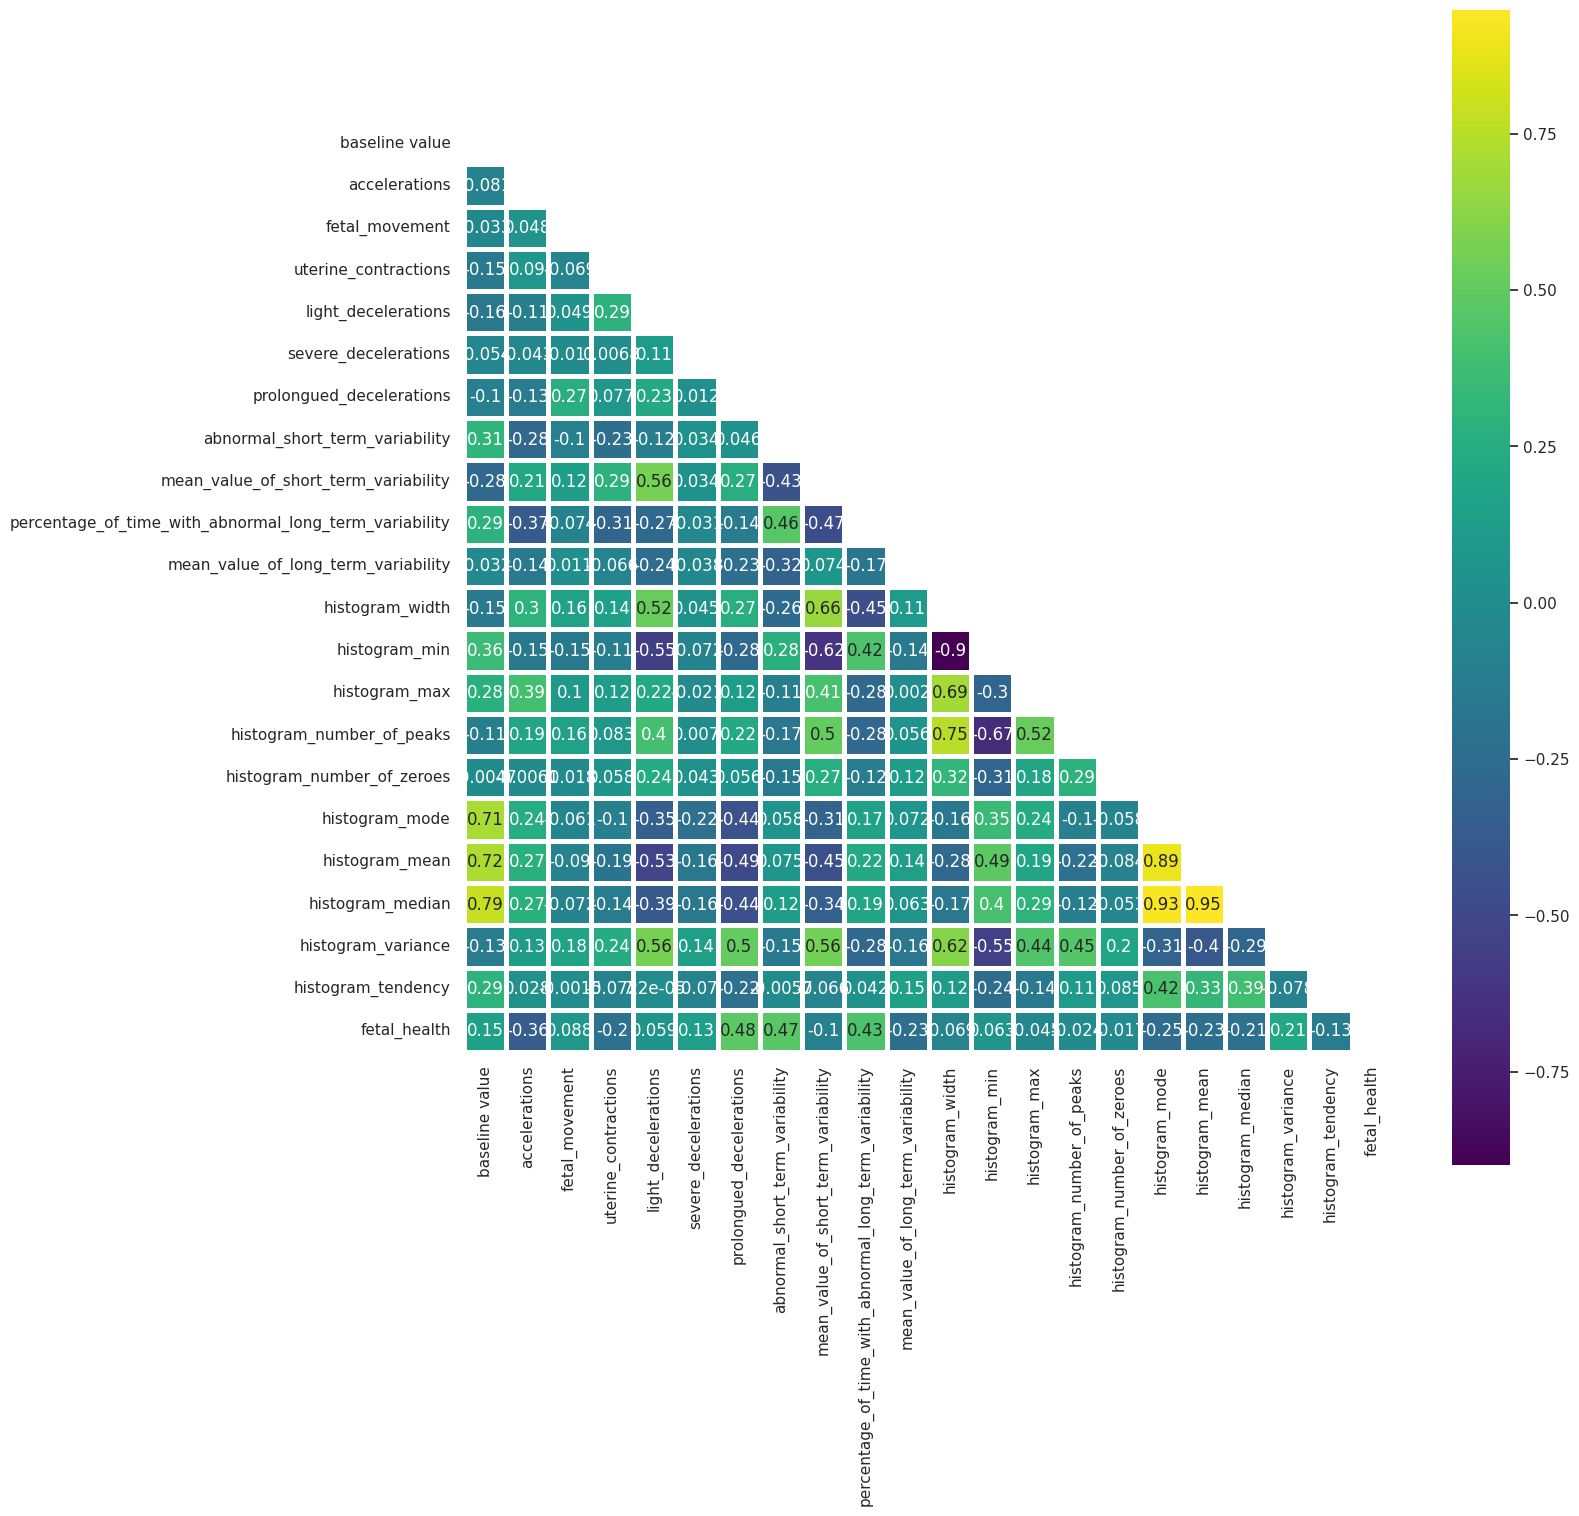

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)

There is strong correlation between baseline value and histogram mode , histogram median and histogram mean.

Histogram number of peaks and histogram width is also having good correlation.

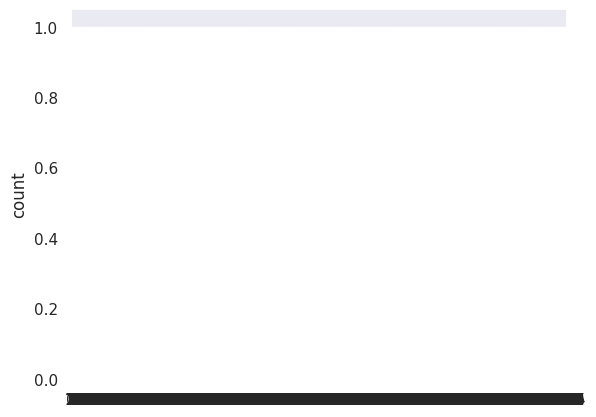

In [ ]:
sns.countplot(Target)
plt.show()

In [ ]:
print("Count of type 1.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==1.0]))
print("Count of type 2.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==2.0]))
print("Count of type 3.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==3.0]))

Count of type 1.0 fetal health in the dataset  1655
Count of type 2.0 fetal health in the dataset  295
Count of type 3.0 fetal health in the dataset  176


In [ ]:
for item in ['histogram_width', 'histogram_median', 'histogram_variance', 'histogram_mode', 'histogram_number_of_peaks', 'histogram_number_of_zeroes','histogram_tendency','histogram_mean','histogram_max','histogram_min','abnormal_short_term_variability']:
  df_dup = df_dup.drop(item, axis = 1)

In [ ]:
updated_cols = list(df.columns)
for column in updated_cols:
    print(column," : ", len(df.loc[df[column]<0]))

baseline value  :  0
accelerations  :  0
fetal_movement  :  0
uterine_contractions  :  0
light_decelerations  :  0
severe_decelerations  :  0
prolongued_decelerations  :  0
abnormal_short_term_variability  :  0
mean_value_of_short_term_variability  :  0
percentage_of_time_with_abnormal_long_term_variability  :  0
mean_value_of_long_term_variability  :  0
histogram_width  :  0
histogram_min  :  0
histogram_max  :  0
histogram_number_of_peaks  :  0
histogram_number_of_zeroes  :  0
histogram_mode  :  0
histogram_mean  :  0
histogram_median  :  0
histogram_variance  :  0
histogram_tendency  :  165
fetal_health  :  0


In [ ]:
X = df_dup.iloc[:,:-1]
y = df_dup.iloc[:,-1]
print(X)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [ ]:
y.value_counts()

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=df_dup.iloc[:,:-1].columns)

# **2. 라벨 수 불균형 해소하기**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_ros, y_ros = ROS.fit_resample(X,y)
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({2.0: 1646, 1.0: 1646, 3.0: 1646})


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1690, 11)
y_train (1690,)
X_test (423, 11)
y_test (423,)


In [ ]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(y.index)) * 100))

79.49% data is in training set
20.02% data is in test set


In [ ]:
def get_train_report(model):

    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

# **Decision Tree Classifier**

In [ ]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

train_report = get_train_report(decision_tree)
print(train_report)
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1320
         2.0       1.00      1.00      1.00       237
         3.0       1.00      1.00      1.00       133

    accuracy                           1.00      1690
   macro avg       1.00      1.00      1.00      1690
weighted avg       1.00      1.00      1.00      1690

              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       326
         2.0       0.78      0.76      0.77        55
         3.0       0.95      0.83      0.89        42

    accuracy                           0.93       423
   macro avg       0.89      0.86      0.87       423
weighted avg       0.93      0.93      0.93       423



In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree = dt_model.fit(X_train, y_train)
train_report = get_train_report(decision_tree)

# print the performance measures
print('Train data:\n', train_report)
test_report = get_test_report(decision_tree)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

         1.0       0.93      0.97      0.95      1320
         2.0       0.82      0.62      0.71       237
         3.0       0.90      0.92      0.91       133

    accuracy                           0.92      1690
   macro avg       0.88      0.84      0.85      1690
weighted avg       0.91      0.92      0.91      1690

Test data:
               precision    recall  f1-score   support

         1.0       0.92      0.95      0.94       326
         2.0       0.76      0.62      0.68        55
         3.0       0.87      0.81      0.84        42

    accuracy                           0.90       423
   macro avg       0.85      0.79      0.82       423
weighted avg       0.89      0.90      0.89       423



# **Random Forest**

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

train_report = get_train_report(rf_model)
print(train_report)
test_report = get_test_report(rf_model)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      1320
         2.0       0.99      0.97      0.98       237
         3.0       1.00      0.98      0.99       133

    accuracy                           0.99      1690
   macro avg       1.00      0.98      0.99      1690
weighted avg       0.99      0.99      0.99      1690

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       326
         2.0       0.82      0.67      0.74        55
         3.0       0.92      0.79      0.85        42

    accuracy                           0.92       423
   macro avg       0.89      0.81      0.85       423
weighted avg       0.92      0.92      0.92       423



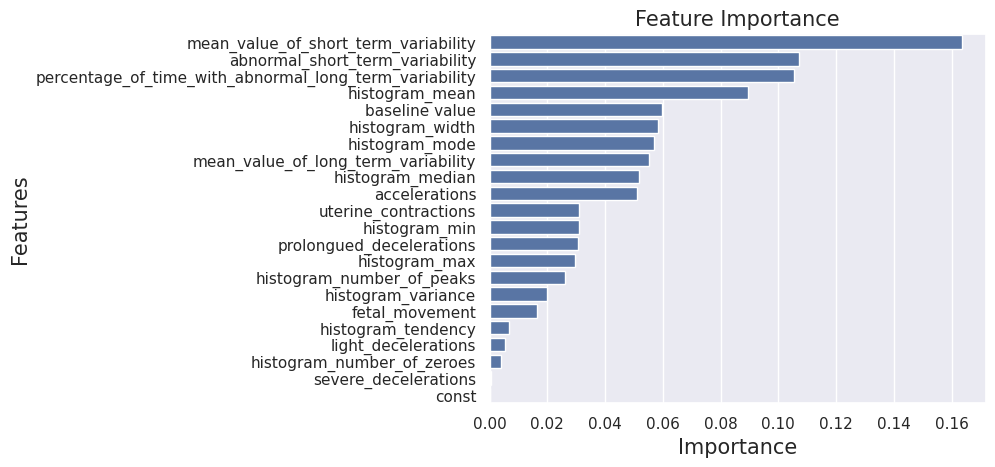

In [ ]:
important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

From the above bar plot, we can see that short term variability is the most important feature in the dataset.

# **K Nearest Neighbors**

In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

train_report = get_train_report(knn_model)
print(train_report)
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98      1320
         2.0       0.89      0.79      0.84       237
         3.0       0.94      0.88      0.91       133

    accuracy                           0.95      1690
   macro avg       0.93      0.89      0.91      1690
weighted avg       0.95      0.95      0.95      1690

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       326
         2.0       0.70      0.67      0.69        55
         3.0       0.89      0.74      0.81        42

    accuracy                           0.90       423
   macro avg       0.84      0.79      0.81       423
weighted avg       0.90      0.90      0.90       423



In [ ]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}

# instantiate the 'KNeighborsClassifier'
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification,
                        param_grid = tuned_paramaters,
                        cv = 5,
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

KeyboardInterrupt: 

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 7}

In [ ]:
from sklearn.model_selection import cross_val_score
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):

    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric
    knn = KNeighborsClassifier(i, metric = 'euclidean')

    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)

    # calculate the mean score
    score = score.mean()

    # compute error rate
    error_rate.append(1 - score)

# plot the error_rate for different values of K
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 7, color = 'red')

# display the plot
plt.show()

We can see that the optimal value of K = 7 obtained from the GridSearchCV results in a lowest error rate.

In [ ]:
train_report = get_train_report(knn_grid)
print(train_report)
test_report = get_test_report(knn_grid)
print(test_report)

# **Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

test_report = get_test_report(gnb_model)
print(test_report)

# **Adaboost Classifier**

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

test_report = get_test_report(ada_model)
print(test_report)

# **Gradient Boosting Classifier**

In [ ]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

test_report = get_test_report(gboost_model)
print(test_report)

# **XGBoost Classifier**

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.metrics import accuracy_score

# 모델의 정확도 계산
xgb_train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
xgb_test_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

# 과적합 정도 평가
xgb_overfitting_degree = xgb_train_accuracy - xgb_test_accuracy

print("Train Accuracy:", xgb_train_accuracy)
print("Test Accuracy:", xgb_test_accuracy)
print("Overfitting Degree:", xgb_overfitting_degree)

Train Accuracy: 0.9662721893491124
Test Accuracy: 0.9314420803782506
Overfitting Degree: 0.034830108970861806


In [ ]:
parameters = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
              "n_estimators": [200, 350, 500, 750],
              "max_depth": [3, 6, 8]
              }

In [ ]:
GridSearchCV_gbcl = GridSearchCV(estimator=XGBClassifier(),
                                param_grid=parameters,
                                cv=2,
                                verbose=1,
                                n_jobs=3,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:
GridSearchCV_gbcl.fit(X_train, y_train);

Fitting 2 folds for each of 84 candidates, totalling 168 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:55:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
best_parameters = GridSearchCV_gbcl.best_params_
print(f"Best parameters for the model:\n{best_parameters}")

Best parameters for the model:
{'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 200}


**Testing**

In [ ]:
xgb = XGBClassifier(learning_rate=0.05, loss="log_loss", max_depth=3, n_estimators=200)

xgb_mod = xgb.fit(X_train, y_train)
pred_xgb = xgb_mod.predict(X_test)

score_xgb_train = xgb_mod.score(X_train, y_train)
score_xgb_test = xgb_mod.score(X_test, y_test)

train_report = get_train_report(xgb_mod)
print(train_report)
test_report = get_test_report(xgb_mod)
print(test_report)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:55:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1320
           1       0.86      0.79      0.82       237
           2       0.97      0.86      0.91       133

    accuracy                           0.95      1690
   macro avg       0.93      0.88      0.90      1690
weighted avg       0.95      0.95      0.95      1690

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       326
           1       0.84      0.69      0.76        55
           2       0.88      0.88      0.88        42

    accuracy                           0.93       423
   macro avg       0.89      0.85      0.87       423
weighted avg       0.93      0.93      0.93       423



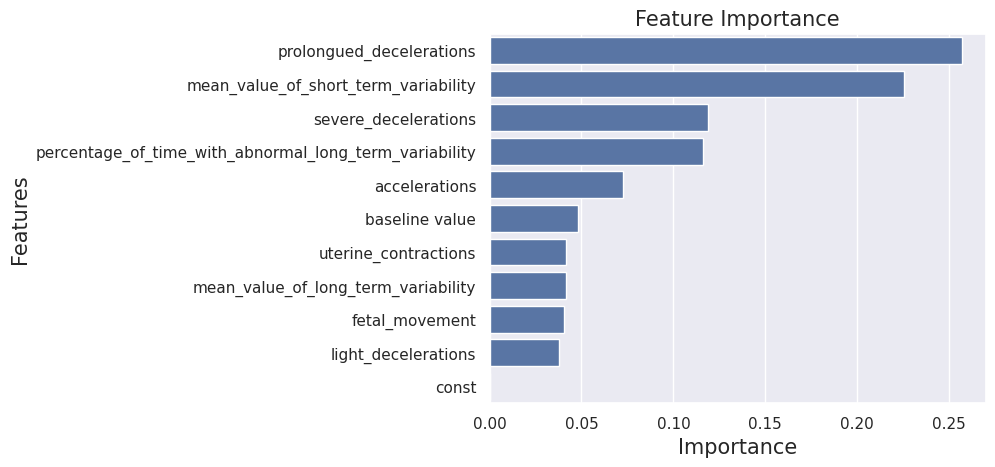

In [ ]:
important_features = pd.DataFrame({'Features': X_train.columns, 'Importance': xgb_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

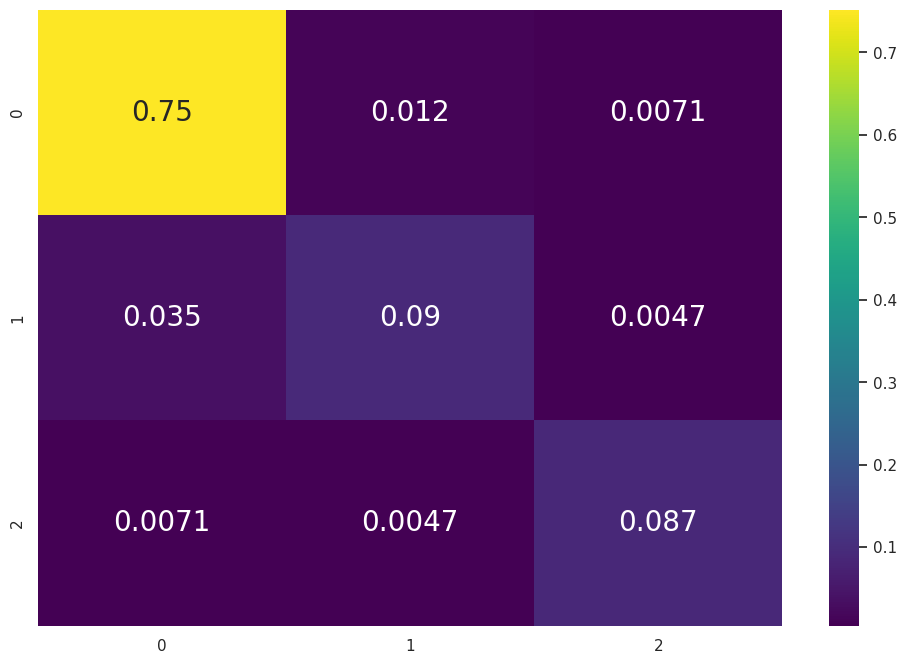

In [ ]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis',annot = True, annot_kws = {'size':20})
plt.show()

# **Support Vector Machine**

In [ ]:
svc_model = SVC(kernel='poly',probability=True)
svc_model.fit(X_train,y_train)

test_report = get_test_report(svc_model)
print(test_report)

Voting Classifier

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors = 7 , weights = 'distance', metric='manhattan' )
clf2 = GradientBoostingClassifier(n_estimators = 150,max_depth = 10,random_state=1)

votingclf = VotingClassifier(estimators=[('knn',clf1),('grb', clf2)],voting='hard')
votingclf = votingclf.fit(X_train,y_train)

test_report = get_test_report(votingclf)
print(test_report)

We tried different algorithms for this dataset among them the boosting based algorithms i.e, XG Boost and Gradient boosting algorithms are performing best for the dataset with an accuracy of 94% on the test dataset and f1 score for XGBoost are 0.96 , 0.85 and 0.87 respectively for three different classes followed by Decision Tree Classifier without hypertuning it with an accuracy of 93% on the test data.

*PLEASE UPVOTE IF YOU LIKE THE ANALYSIS*